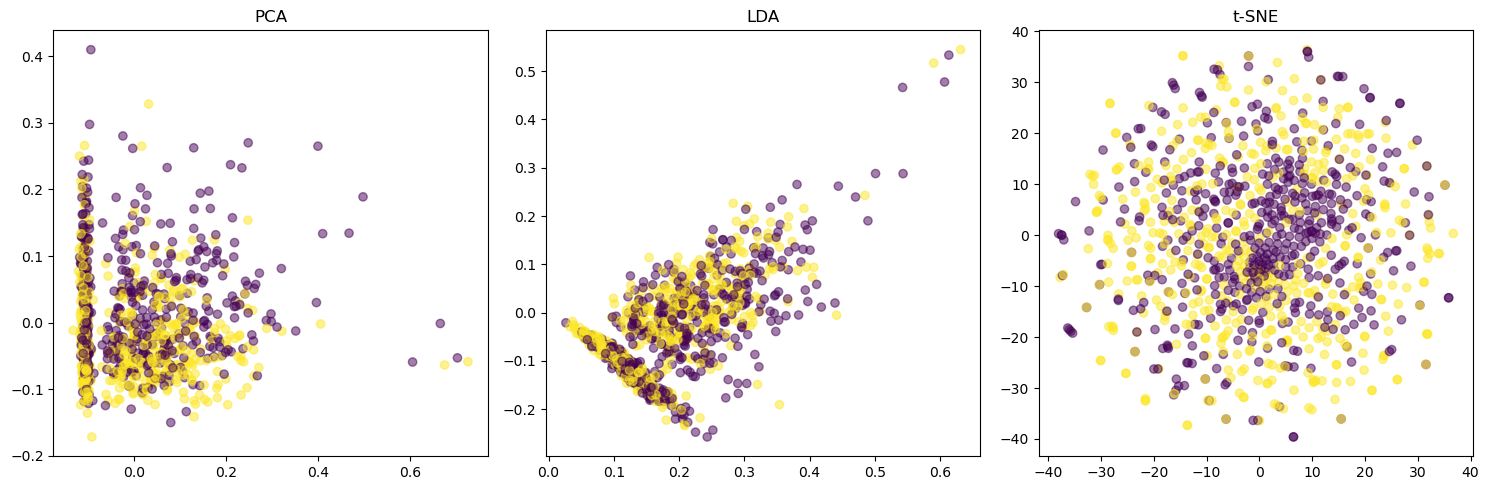

In [14]:
#### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os
import urllib.request
import tarfile

# Create directory if not exist
if not os.path.exists("./aclImdb"):
    os.makedirs("./aclImdb")

# Download and extract the Large Movie Review Dataset
url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
file_path = "./aclImdb/aclImdb_v1.tar.gz"

if not os.path.exists(file_path):
    urllib.request.urlretrieve(url, file_path)

# Extracting the dataset
with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall("./aclImdb")

# Load the data
reviews_train = load_files("./aclImdb/aclImdb/train/", categories=['pos', 'neg'])
reviews_test = load_files("./aclImdb/aclImdb/test/", categories=['pos', 'neg'])

# Take a subset of the data
subset_size = 1000
reviews_train_subset = reviews_train.data[:subset_size]
reviews_train_target_subset = reviews_train.target[:subset_size]

# Vectorizing the text data
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train = vectorizer.fit_transform(reviews_train_subset)
X_test = vectorizer.transform(reviews_test.data)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train.toarray())

# Reduce dimensionality using LDA
lda = TruncatedSVD(n_components=2)
X_lda = lda.fit_transform(X_train)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_train.toarray())

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=reviews_train_target_subset, cmap='viridis', alpha=0.5)
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=reviews_train_target_subset, cmap='viridis', alpha=0.5)
plt.title('LDA')

plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=reviews_train_target_subset, cmap='viridis', alpha=0.5)
plt.title('t-SNE')

plt.tight_layout()
plt.show()







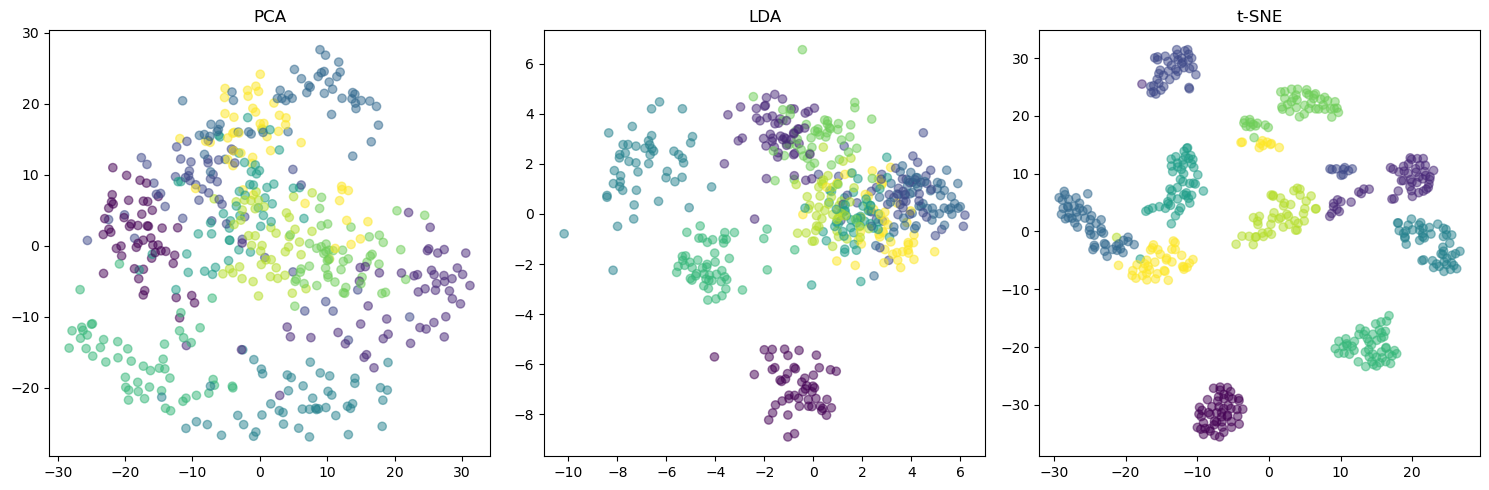

In [21]:
#### import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the digits dataset
digits = load_digits()

# Take a subset of the data
subset_size = 500
data_subset = digits.data[:subset_size]
target_subset = digits.target[:subset_size]

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_subset)

# Reduce dimensionality using LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(data_subset, target_subset)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(data_subset)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_subset, cmap='viridis', alpha=0.5)
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=target_subset, cmap='viridis', alpha=0.5)
plt.title('LDA')

plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target_subset, cmap='viridis', alpha=0.5)
plt.title('t-SNE')

plt.tight_layout()
plt.show()